# **INFO5731 In-class Exercise 3**

The purpose of this exercise is to explore various aspects of text analysis, including feature extraction, feature selection, and text similarity ranking.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission. , and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)
Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [7]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:  I'm interested in gauging the sentiment surrounding the use of oximeters, particularly amidst the surge in usage during the COVID-19 pandemic. My focus is on understanding the utility of different features and gathering insights from user opinions.

To kickstart this analysis, I plan to zoom in on a specific manufacturer's oximeter product and delve into sentiment analysis of user reviews. By examining sentiment, I aim to grasp users' feedback nuances, while leveraging frequency vectors from the data cloud to highlight prominent features.

For sentiment analysis, I intend to employ POS tagging, a technique that assigns parts of speech to words in the text, thereby delineating their primary context, function, and usage within sentences. My focus will encompass tags such as nouns, verbs, personal pronouns, adjectives, adverbs, coordinating conjunctions, and interjections.

The reviews, tagged with POS, will be transformed into numerical matrices, serving as input for classifiers tasked with discerning sentiment within the text.

Here's the link to the reviews for the 'Zacurate Pro Series 500DL Fingertip Pulse Oximeter': https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3





'''

'\nPlease write you answer here:\n\n\n\n\n\n'

## Question 2 (10 Points)
Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction.

In [8]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip())
df_revw = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f'Shape of the data frame: {df_revw.shape}')
df_revw.head()

Shape of the data frame: (220, 2)


,Title,Review
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was..."
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r..."
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...


In [9]:
df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
df_revw.head()

<ipython-input-9-f7811169a042>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",I like the size the accuracy Its easy to read
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,My mom was in the hospital for about a month W...
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,I am a nurse and also the care taker in the fa...
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,I have had many different oximeters that took ...


In [10]:
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw.head()

<ipython-input-10-6abc76212b44>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",I like the size the accuracy Its easy to read
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,My mom was in the hospital for about a month W...
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,I am a nurse and also the care taker in the fa...
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,I have had many different oximeters that took ...


In [11]:
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_revw.head()

,Title,Review,preprocessed_review
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",i like the size the accuracy its easy to read
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,my mom was in the hospital for about a month w...
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,i am a nurse and also the care taker in the fa...
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,i have had many different oximeters that took ...


In [13]:
pip install nltk


In [15]:
import nltk
nltk.download('stopwords')
#nltk.download()
from nltk.corpus import stopwords
sw = stopwords.words('english')
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_revw.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,Review,preprocessed_review
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",like size accuracy easy read
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,mom hospital month oxygen also abnormal heart ...
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,nurse also care taker family needed new one gr...
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,many different oximeters took long time get re...


In [17]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
import nltk
nltk.download('omw-1.4')
from textblob import Word
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_revw.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Title,Review,preprocessed_review
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",like size accuracy easy read
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,mom hospital month oxygen also abnormal heart ...
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,nurse also care taker family needed new one gr...
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,many different oximeter took long time get rea...


In [20]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_revw['tagged_pos'] = df_revw['preprocessed_review'].str.split().map(pos_tag)
df_revw.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Title,Review,preprocessed_review,tagged_pos
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",like size accuracy easy read,"[(like, IN), (size, NN), (accuracy, NN), (easy..."
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,mom hospital month oxygen also abnormal heart ...,"[(mom, JJ), (hospital, JJ), (month, NN), (oxyg..."
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,nurse also care taker family needed new one gr...,"[(nurse, NN), (also, RB), (care, NN), (taker, ..."
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,many different oximeter took long time get rea...,"[(many, JJ), (different, JJ), (oximeter, NN), ..."


In [21]:
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1

    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(df_revw['tagged_pos'])
df_revw['num of adj'] = adjective
df_revw['num of adverb'] = adverb
df_revw['num of conjunction'] = c_con
df_revw['num of conjuction'] = s_con
df_revw['num of interjection'] = intj
df_revw['num of noun'] = no
df_revw['num of verb'] = ve
df_revw['num of pronoun'] = pro
df_revw['nump of predeterminer'] = pre
df_revw['num of determiner'] = det

df_revw.head()

,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,5.0 out of 5 stars\nZacurate Oximeter vs. MiBe...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,"5.0 out of 5 stars\nworks, is accurate","I like the size, the accuracy. It's easy to r...",like size accuracy easy read,"[(like, IN), (size, NN), (accuracy, NN), (easy...",1,0,0,1,0,3,0,0,0,0
2,5.0 out of 5 stars\nWorks well!,My mom was in the hospital for about a month. ...,mom hospital month oxygen also abnormal heart ...,"[(mom, JJ), (hospital, JJ), (month, NN), (oxyg...",6,4,0,0,0,12,0,1,0,0
3,4.0 out of 5 stars\nWorks well,I am a nurse and also the care taker in the fa...,nurse also care taker family needed new one gr...,"[(nurse, NN), (also, RB), (care, NN), (taker, ...",5,1,0,0,0,6,0,0,0,0
4,5.0 out of 5 stars\nFast Reading,I have had many different oximeters that took ...,many different oximeter took long time get rea...,"[(many, JJ), (different, JJ), (oximeter, NN), ...",18,11,0,0,0,33,0,0,0,0


## Question 3 (10 points):
Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)."

Select the most important features you extracted above, rank the features based on their importance in the descending order.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = df_revw.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat.head()

Shape: (220, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,52,28,0,2,0,90,0,0,0,0
1,1,0,0,1,0,3,0,0,0,0
2,6,4,0,0,0,12,0,1,0,0
3,5,1,0,0,0,6,0,0,0,0
4,18,11,0,0,0,33,0,0,0,0


In [23]:
a = num_feat
b = df_revw['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')

SHAPE of X: (220, 10)
SHAPE of Y: (220,)


In [24]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape

((176, 10), (44, 10))

<Axes: >

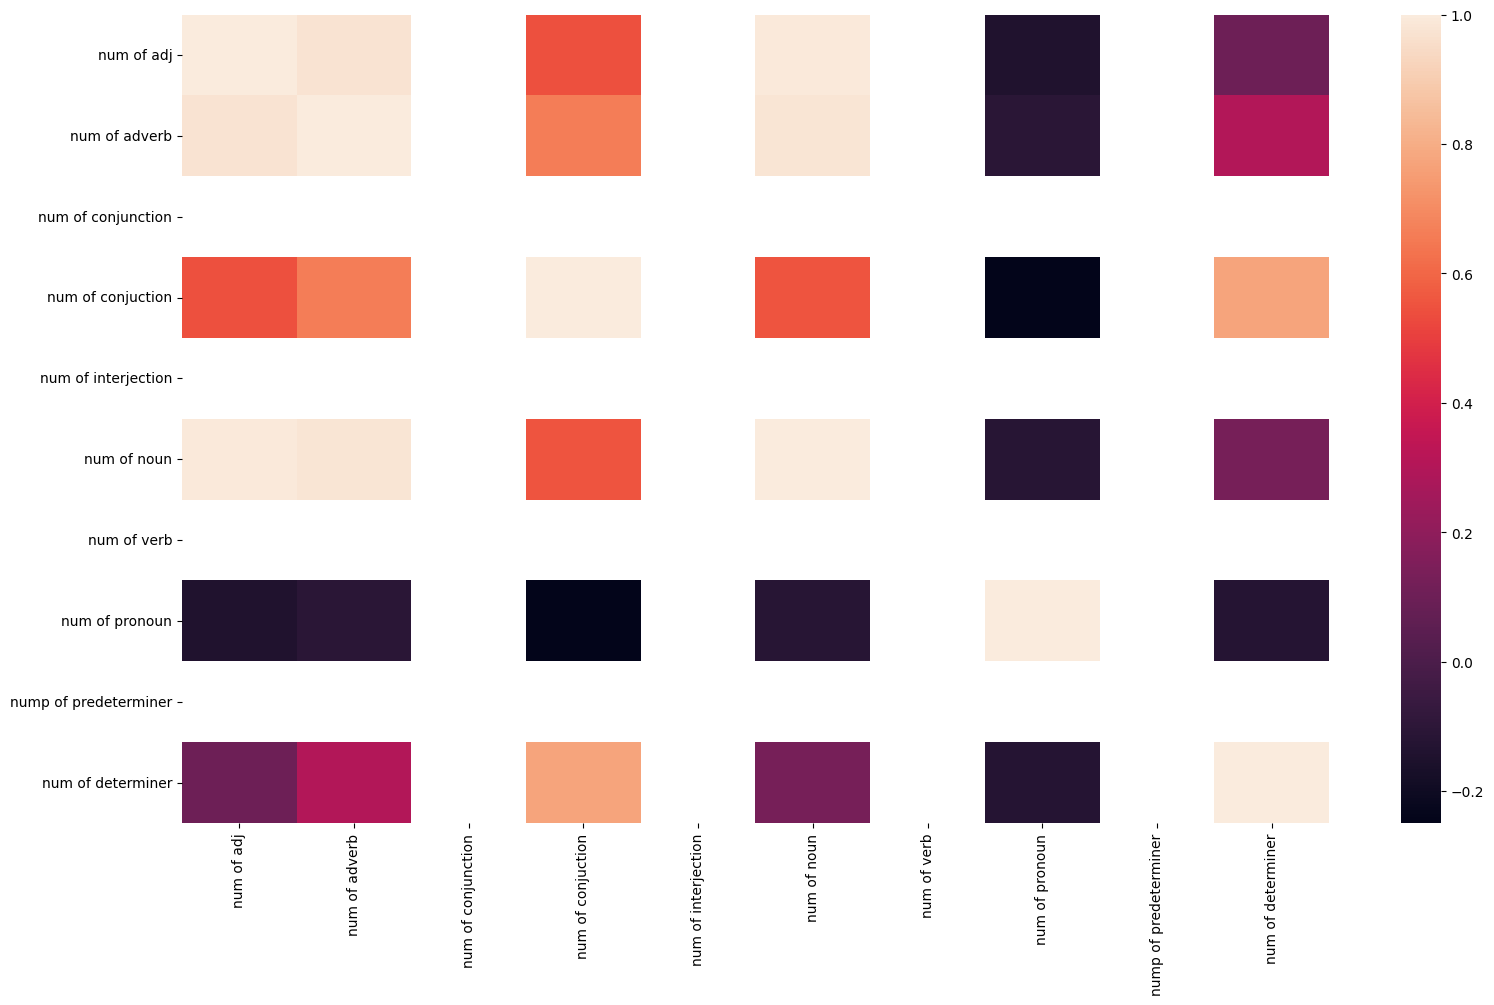

In [25]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)


In [28]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of adverb', 'num of determiner', 'num of conjuction', 'num of noun'}


In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [29]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
3,num of noun,0.380586
0,num of adverb,0.304749
1,num of determiner,0.200133
2,num of conjuction,0.114532


## Question 4 (10 points):
Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order.

In [31]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 3.2 MB/s eta 0:00:00


In [32]:
# You code here (Please add comments in the code):
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Preprocess text data
df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))

# Step 2: Load BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Step 3: Represent text data using BERT embeddings
text_embeddings = model.encode(df_revw['preprocessed_review'].tolist())

# Step 4: Design query and represent it using BERT embeddings
query = "What are users saying about the accuracy of the Zacurate Pro Series 500DL Fingertip Pulse Oximeter?"
query_embedding = model.encode(query)


# Step 5: Calculate cosine similarity between query and text data
cosine_similarities = cosine_similarity([query_embedding], text_embeddings)

# Step 6: Rank similarity scores in descending order
ranked_indices = cosine_similarities.argsort()[0][::-1]
ranked_scores = cosine_similarities[0][ranked_indices]

# Step 7: Print ranked documents
for idx, score in zip(ranked_indices, ranked_scores):
    print(f"Score: {score:.4f}")
    print(df_revw.iloc[idx]['Review'])
    print("="*50)





<ipython-input-32-e31eabe21bae>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
<ipython-input-32-e31eabe21bae>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Score: 0.5103
I have had many different oximeters that took a long time to get a O2 reading so I thought that was as good as I could get.  This one delivers as promised, maybe even better. I get a reading in under 10 seconds.  Maybe the silicon case makes a difference, I don't know.  In addition to the fast reading, the silicone cover is easy to get on and off to change batteries, it feels very nice and secure in my hand, and protects the oximeter if I drop it.  The lanyard was EASY to attach because of the way the product was designed.  If you've ever tried to attach a lanyard on one of these devices, you know what "poor design" means: you'll try tweezers, wires, needles, etc to get that loop to come up on the other side of the hole and then try to grab it with your "tools".  The snap on the lanyard makes it easy to detach and reattach the oximeter to the lanyard .  If you use an oximeter frequently, I think this is the best one for the price.
Score: 0.5103
I have had many different o

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment. Consider the following points in your response:

Learning Experience: Describe your overall learning experience in working on extracting features from text data. What were the key concepts or techniques you found most beneficial in understanding the process?

Challenges Encountered: Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Learning Experience:
Working on extracting features from text data was an insightful learning experience. One of the key concepts I found most beneficial was understanding the importance of preprocessing text data, including steps like removing special characters, lowercasing, and eliminating stopwords. Additionally, learning about part-of-speech tagging and its role in extracting linguistic features was valuable.

Challenges Encountered:
One of the challenges encountered during this exercise was ensuring the compatibility of different libraries and modules used for text preprocessing, such as NLTK and TextBlob. Managing dependencies and resolving version conflicts required careful attention. Additionally, understanding the nuances of feature extraction techniques and choosing the most relevant features for the task posed some difficulty.

Relevance to Field of Study:
This exercise directly relates to the field of Natural Language Processing (NLP). Feature extraction is a fundamental step in NLP tasks such as sentiment analysis, text classification, and information retrieval. By extracting and representing relevant features from text data, NLP models can better understand and interpret the underlying semantics, leading to more accurate and meaningful analyses. Therefore, mastering feature extraction techniques is crucial for anyone working in NLP or related fields.





'''